# Projet SD201 PETITJEAN D'HAUTHUILLE
## Student Grade Prediction

Nous choisissons d'utiliser la base de donnée suivante: student-mat.csv. Cette base de donnée récolte une grosse quantité de donnée sur des élèves ainsi que leurs final grade. 

In [1]:
!pip install scikit-learn


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import f1_score, roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix


In [3]:
students = pd.read_csv(open("student-mat.csv"))

students

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

### 1.1 Data cleaning


La base de données est très large, le nombre de colonnes y ait très important. Toutes les colonnes ont une utilité pour déterminer la note d'un élève. Pourtant, leur importance n'est pas la même, il va de soit qu'il est bien plus pertinent de connaitre le nombre de redoublements d'un élève que son temps de trajet. 

Nous allons donc supprimer quelques colonnes de cette base de données. 

Premièrement, nous voyons que dans la majorité des cas la consommation d'alcool le week-end est souvent liée à la consommation quotidienne et que les différences sont présentes en trop petit nombre pour avoir un impact sur notre algorithme. Nous enlevons donc la colonne "Dalc"

In [4]:
students = students.drop(["Dalc", "famsize", "nursery", "higher", "Mjob", "Fjob","G2","G3"], axis = 1)

In [46]:
#On remplace par des valeurs numériques pour le DecisionTree

#school
students2 = students.replace('GP', 0)
students2 = students2.replace('MS', 1)

#sex
students2 = students2.replace('F', 0)
students2 = students2.replace('M', 1)

#address 
students2 = students2.replace('U', 0)
students2 = students2.replace('R', 1)

#Pstatus
students2 = students2.replace('A', 0)
students2 = students2.replace('T', 1)

#Reason
students2 = students2.replace('home', 0)
students2 = students2.replace('course', 1)
students2 = students2.replace('reputation', 2)
students2 = students2.replace('other', 3)

#Guardian
students2 = students2.replace('mother', 0)
students2 = students2.replace('father', 1)
students2 = students2.replace('other', 2)

#schoolsup
students2 = students2.replace('no', 0)
students2 = students2.replace('yes', 1)

students2



school  sex  age  address  Pstatus  Medu  Fedu  reason  guardian  \
0         0    0   18        0        0     4     4       1         0   
1         0    0   17        0        1     1     1       1         1   
2         0    0   15        0        1     1     1       3         0   
3         0    0   15        0        1     4     2       0         0   
4         0    0   16        0        1     3     3       0         1   
..      ...  ...  ...      ...      ...   ...   ...     ...       ...   
390       1    1   20        0        0     2     2       1         3   
391       1    1   17        0        1     3     1       1         0   
392       1    1   21        1        1     1     1       1         3   
393       1    1   18        1        1     3     2       1         0   
394       1    1   19        0        1     1     1       1         1   

     traveltime  ...  activities  internet  romantic  famrel  freetime  goout  \
0             2  ...           0         0         0       4         3      4   
1             1  ...           0         1         0       5         3      3   
2             1  ...           0         1         0       4         3      2   
3             1  ...           1         1         1       3         2      2   
4             1  ...           0         0         0       4         3      2   
..          ...  ...         ...       ...       ...     ...       ...    ...   
390           1  ...           0         0         0       5         5      4   
391           2  ...           0         1         0       2         4      5   
392           1  ...           0         0         0       5         5      3   
393           3  ...           0         1         0       4         4      1   
394           1  ...           0         1         0       3         2      3   

     Walc  health  absences  G1  
0       1       3         6   5  
1       1       3         4   5  
2       3       3        10   7  
3       1       5         2  15  
4       2       5         4   6  
..    ...     ...       ...  ..  
390     5       4        11   9  
391     4       2         3  14  
392     3       3         3  10  
393     4       5         0  11  
394     3       5         5   8  

[395 rows x 25 columns]

###  1.2 Let's look first at the data

In [6]:
#On affiche la moyenne des notes par parametre(failure ou absences par ex)

def correlation(parameter):
    list = np.array(students[[parameter]]).T[0]
    grade = np.array(students[["G1"]]).T[0]
    unique = np.unique(list)
    M = []
    for elt in unique:
        S=0
        poids = (list==elt).sum()
        for i in range(len(list)):
            if list[i]==elt:
                S += grade[i]
        mean = S/poids
        M.append([elt, mean])
    M1=np.array(M)
    plt.plot(M1.T[0],M1.T[1])
    plt.title("Moyenne des notes par "+parameter)
    plt.xlabel(parameter)
    plt.ylabel("Moyenne des notes")
    plt.show()

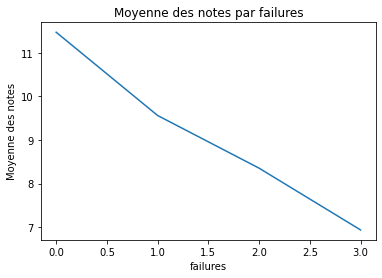

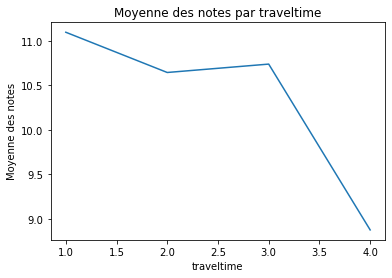

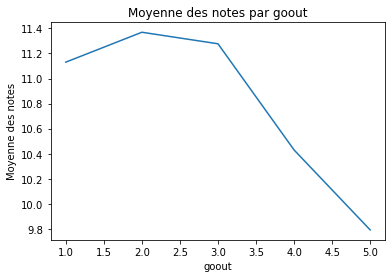

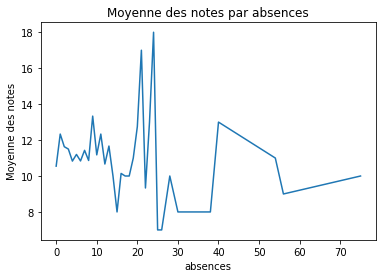

In [7]:
M=np.array(correlation("failures"))
M=np.array(correlation("traveltime"))
M=np.array(correlation("goout"))
M=np.array(correlation("absences"))

### 1.3.1 Train and test datasets


In [8]:
from sklearn.model_selection import train_test_split
X=students2.drop("G1",axis=1)
Y=students2["G1"]

X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size=0.20)


### 1.3.2 Decision Tree

Quelques fonctions utiles:

In [9]:
#Fonction pour calculer la moyennes erreurs en valeur absolue entre un set B et un set A
def MAE(B, A):
    #On calcule le MAE
    tab=[]
    for i in range(np.shape(A)[0]):
        tab.append(abs(A[i]-B[i]))
    print("MAE=",sum(tab)/len(tab))
    print('\n')
    print("Erreur absolue maximum =",max(tab))




    #On affiche l'occurence d'une erreur en fonction de sa valeur 
    count=[0]*19
    for i in range(0,20):
        for a in tab:
            if a==i:
                count[i]+=1
            
    plt.plot([i for i in range(len(count))],count)
    plt.xlabel("Erreur en valeur absolue")
    plt.ylabel("Occurences de l'erreur")

#Affichage pour comparer la prediction du model avec la data test
def Comparaison(data, prediction):
    
    fig, ax = plt.subplots(1, 1)
    ax.plot([i for i in range(len(data))], data, ".", label='data')
    ax.plot([i for i in range(len(prediction))], prediction, "-", label="predictions")
    ax.legend()
    


<b> 1.3.2.1 Decisiont Tree Classifier

In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)



In [35]:
#On affiche le decision tree
fig = plt.figure(figsize=(24,24),dpi=250,facecolor="white")
tree.plot_tree(dt);
fig.savefig("decision_tree.png")
#plt.savefig('filename.pdf')

In [12]:
print("f1_score =",f1_score(y_test, y_pred,average='micro'))


f1_score = 0.08860759493670886


MAE= 3.4430379746835444


Erreur absolue maximum = 12


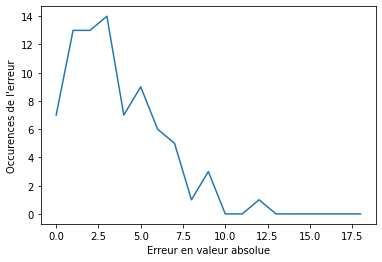

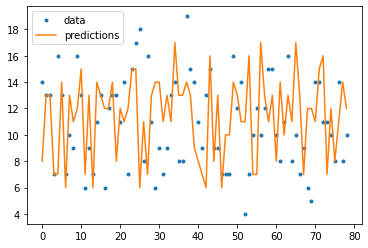

In [13]:
#On a besoin de y test en array:
y_test_array=np.array(y_test)

#On affiche le MAE du DecisionTreeClassifier
MAE(y_test_array, y_pred)

Comparaison(y_test_array, y_pred)

<b> 1.3.2.2 Decisiont Tree Regressor

MAE= 3.484848484848485


Erreur absolue maximum = 12.0


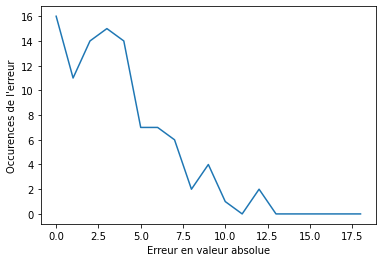

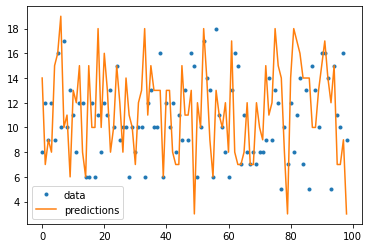

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

x_trainReg, x_testReg, y_trainReg, y_testReg = train_test_split(X, Y, test_size = 0.25, random_state = 45)

modelReg = DecisionTreeRegressor()
modelReg.fit(x_trainReg, y_trainReg)

y_predReg = modelReg.predict(x_testReg)

y_testReg_array=np.array(y_testReg).T


MAE(y_testReg_array, y_predReg)

Comparaison(y_testReg_array, y_predReg)



### 1.3.3 Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


#I name RF for RandomForest

# creating a model
model = RandomForestClassifier()

#Spliting
x_trainRF, x_testRF, y_trainRF, y_testRF = train_test_split(X, Y, test_size = 0.25, random_state = 45)

# feeding the training data to the model
model.fit(x_trainRF, y_trainRF)

# predicting the x-test results
y_predRF = model.predict(x_testRF)


# calculating the accuracies
print("Training Accuracy :", model.score(x_trainRF, y_trainRF))
print("Testing Accuracy :", model.score(x_testRF, y_testRF))



Training Accuracy : 1.0
Testing Accuracy : 0.16161616161616163


MAE= 2.787878787878788


Erreur absolue maximum = 10


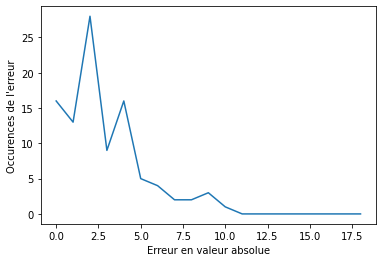

In [21]:
#Encore une fois, on transforme y_test en array:
y_testRF_array=np.array(y_testRF).T

MAE(y_testRF_array, y_predRF)


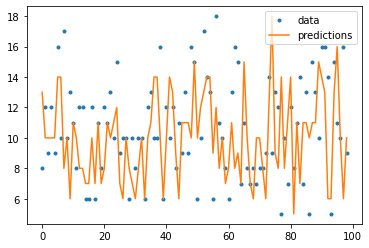

In [22]:
Comparaison(y_testRF_array, y_predRF)

In [24]:
f1_score(y_testRF_array,y_predRF ,average="micro")

0.16161616161616163

## Clustering
### KMeans

In [25]:
from sklearn.cluster import KMeans
import numpy as np

In [26]:
# Conversion des données en tableau numpy

data_frames = pd.DataFrame(students2)

required_array = np.array(data_frames.values)
print(required_array)

[[ 0  0 18 ...  3  6  5]
 [ 0  0 17 ...  3  4  5]
 [ 0  0 15 ...  3 10  7]
 ...
 [ 1  1 21 ...  3  3 10]
 [ 1  1 18 ...  5  0 11]
 [ 1  1 19 ...  5  5  8]]


In [27]:
# Nous apliquons le clustering
kmeans = KMeans(init='random', n_clusters=4, max_iter=10000, n_init=10).fit(required_array)

In [28]:
label = kmeans.labels_
label

array([1, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1,
       2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 0, 1, 1, 0, 3, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0,
       2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1,
       2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 2, 0, 0, 3, 2, 2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 1,
       2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 1,
       1, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1,
       1, 2, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 3, 2, 2, 1, 2, 2, 0, 1, 1, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2,

<b>Info vs Grade


In [29]:
def notePerLabel(tab, label):
    M = []
    for lab in range(20):
        L=[]
        for i in range(len(label)):
            if tab.T[0][i] == lab:
                a = tab.T[1][i]
                L.append(a)
        M.append(L)
    return(np.array(M)) # liste des listes des notes obtenues pour chaque label

In [30]:
def quantile(M, q1, q3):
    n = len(M)
    Q=[]
    for i in range(n):
        q =[]
        Q1 = np.quantile(M[i],q1)
        Q3 = np.quantile(M[i],q3)
        
        for j in range(len(M[i])):
            if M[i][j]<=Q3 and M[i][j]>=Q1:
                q.append(M[i][j])
        Q.append(q)
    return(np.array(Q))

In [31]:
def graph(tab, label, q1, q3):
    M = notePerLabel(tab, label)
    Q = quantile(M, q1, q3)
    G=np.zeros(shape=(395,2))
    s = 0
    for i in range(20):
        for j in range(len(Q[i])):
            a = Q[i][j]
            G[s]=[i, a]
            s+=1
            
    plt.scatter(G.T[0], G.T[1])
    plt.title("quantiles")
    plt.show()
    
    return(True)
        

<ipython-input-32-cf8b86c55739>:24: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  tab[i] = [label[i], grade_array[i]]


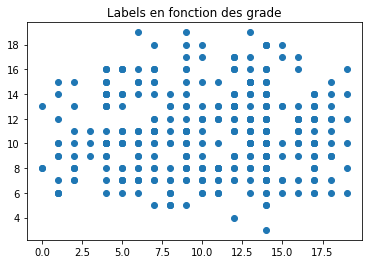

<ipython-input-29-7f85a7b439f4>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.array(M)) # liste des listes des notes obtenues pour chaque label
<ipython-input-30-8862bc1e9a71>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.array(Q))


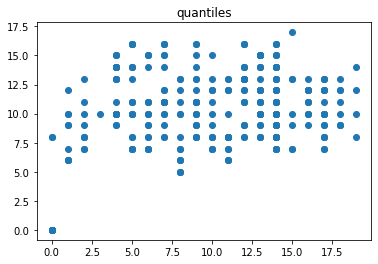

True

In [32]:
def clusterInfo(q1, q3):
    
    #Premièrement, on réccupére les données qui nous intéresse
    
    info = students2.drop(["G1"], axis = 1)
    grade = students2[["G1"]]

    data_frames = pd.DataFrame(info)
    info_array = np.array(data_frames.values)

    data_frames2 = pd.DataFrame(grade)
    grade_array = np.array(data_frames2.values)
    
    #On exécute la méthode Kmeans avec 20 clusters 
    
    kmeans = KMeans(init='random', n_clusters=20, max_iter=10000, n_init=10).fit(info_array)

    label = kmeans.labels_
    
    #On affiche les labels en fonction des notes pour chaque élève
    
    tab = np.zeros(shape=(395,2))
    for i in range(len(tab)):
        tab[i] = [label[i], grade_array[i]]
    
    plt.scatter(tab.T[0], tab.T[1])
    plt.title("Labels en fonction des grade")
    plt.show()
    
    #On affiche ensuite les grade réduit à un certains quartiles 
    
    graph(tab, label, q1, q3)
    
    return(True)

clusterInfo(0.10, 0.90)

### Une seule info vs Grade

In [33]:
def plot_cluster(information):
    info = students2[information]
    grade = students2[["G1"]]

    data_frames = pd.DataFrame(info)
    info_array = np.array(data_frames.values)

    data_frames2 = pd.DataFrame(grade)
    grade_array = np.array(data_frames2.values)
    
    kmeans = KMeans(init='random', n_clusters=20, max_iter=10000, n_init=10).fit(info_array)
    
    label = kmeans.labels_
    tab = np.zeros(shape=(395,2))
    for i in range(len(tab)):
        tab[i] = [label[i], grade_array[i]]
    
    plt.scatter(tab.T[0], tab.T[1])
    plt.title(information)
    plt.show()
        
    return(True)


<ipython-input-496-3b0c32104b95>:16: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  tab[i] = [label[i], grade_array[i]]


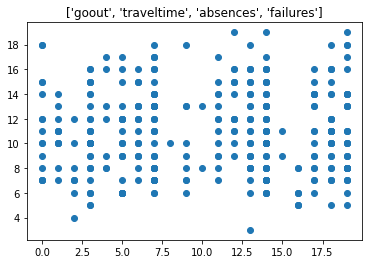

<ipython-input-496-3b0c32104b95>:11: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  kmeans = KMeans(init='random', n_clusters=20, max_iter=10000, n_init=10).fit(info_array)
<ipython-input-496-3b0c32104b95>:16: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  tab[i] = [label[i], grade_array[i]]


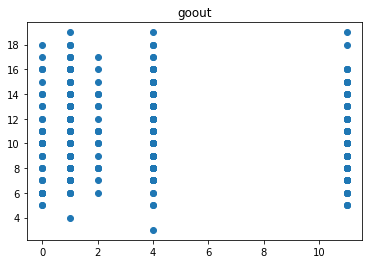

<ipython-input-496-3b0c32104b95>:11: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  kmeans = KMeans(init='random', n_clusters=20, max_iter=10000, n_init=10).fit(info_array)
<ipython-input-496-3b0c32104b95>:16: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  tab[i] = [label[i], grade_array[i]]


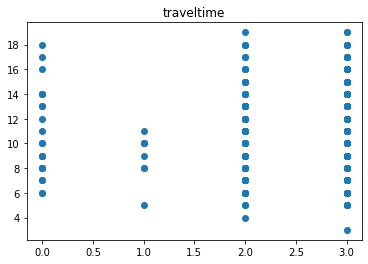

<ipython-input-496-3b0c32104b95>:16: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  tab[i] = [label[i], grade_array[i]]


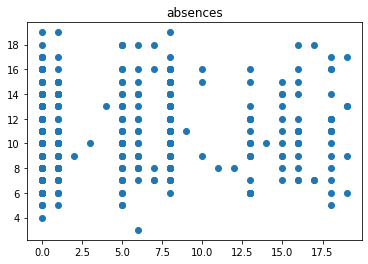

True

In [498]:
plot_cluster(["goout", "traveltime", "absences", "failures"])

plot_cluster("goout")

plot_cluster("traveltime")

plot_cluster("absences")


